# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement based on the Ridge regression example, the Lasso regression.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. 
Next do a loop and finally compare the results.

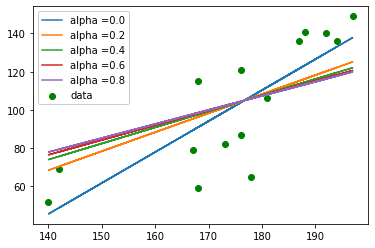

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def reg_predict(inputs, w, b):
    results = []
    for inp in inputs:
        results.append(inp*w+b)
    return results

x0 = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x0])

I = np.identity(2)
alpha = [x/5 for x in range(5)]
w_list = []
for a in alpha:
    # add 1-3 line of code here
    w = np.linalg.inv(x.T*x + a * I)*x.T*y
    w_list.append(w.ravel())


# add 1-3 lines to compare the results
plt.scatter(x0.flatten(), y.flatten(),color='g', label="data")
i = 0

for a in alpha:
    label_id = "alpha ="+str(a)
    plt.plot(x0, reg_predict(x0.flatten(), w_list[i][0,1], w_list[i][0,0]), label=label_id)
    i+=1

plt.legend(framealpha=1, frameon=True)
plt.show()
# plt.plot(x, w[0])


## 2. Implement based on the Ridge regression example, the Lasso regression.

You need only update the compare the results with the sklearn results. You should get
[1.61776499, -180.8579086].

In [9]:
print("Wartości współczynników z poprzedniego zadanka dla alpha 0.0 (Dlaczego nie dla 0.1?)")
print(w_list[0])


Wartości współczynników z poprzedniego zadanka dla alpha 0.0 (Dlaczego nie dla 0.1?)
[[-180.92401772    1.61814247]]


In [10]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 

w = np.linalg.inv(x.T*x + alpha * I)*x.T*y # update this line
w=w.ravel()
print("Wartości współczynników dla alpha 0.1 = "+str(w))

Wartości współczynników dla alpha 0.1 = [[-101.72397081    1.16978757]]


In [11]:
#poniżej- kopia z wykładu
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=x, 
                      y=y)
lasso_regression.coef_, lasso_regression.intercept_ 
print("Wartości współczynników regresji Lasso \n"+str(lasso_regression.coef_[1])+"\n"+ str(lasso_regression.intercept_))
#plot nie działa ale na tak na prawdę nie musi działać
# plt.scatter(x, y,color='g')
# plt.plot(x, lasso_regression.predict(x),color='k')
# 
# plt.show()

Wartości współczynników regresji Lasso 
1.6177649901016677
[-180.8579086]


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

$$S_W = \sum_{k=1}^3 S_k$$

$$S_k = \sum_{n\in C_k} (x_n -m_k)(x_n-m_k)^T$$

$$S_B=\sum_{k=1}^3 N_k (m_k-m)(m_k-m)^T$$

$$W = max_D (eig(S_W^{-1} S_B ))$$

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df_target = pd.DataFrame(iris_data.target)



x = iris_df['sepal width (cm)'].values # change here
y = iris_df['sepal length (cm)'].values # change here
z = iris_df_target[0].values # change here


dataset_size = np.size(x)
print(np.size(x) == np.size(y),np.size(x) == np.size(z)) 

mean_x, mean_y, mean_z = np.mean(x), np.mean(y), np.mean(z)
m_global = np.mean(x+y+z)

scatter_x = np.dot((x-mean_x),(x-mean_x).T)
scatter_y = np.dot((y-mean_y),(y-mean_y).T)
scatter_z = np.dot((z-mean_z),(z-mean_z).T)

SS_W = scatter_x+scatter_y+scatter_z
print(SS_W)


SS_B = (dataset_size*(m_global-mean_x)*(m_global-mean_x).T)+(dataset_size*(m_global-mean_y)*(m_global-mean_y).T)+(dataset_size*(m_global-mean_z)*(m_global-mean_z).T)
# SS_w = (np.sum((x-mean_x)**2))+np.sum((y-mean_y)**2)+np.sum((z-mean_z)**2)

a =(SS_B/SS_W)
b = a*(mean_y + mean_x+mean_z)/2


y_pred = a * x + b
print("a= "+str(a)+ "\n b= "+ str(b))

True True
230.4752666666667
a= 92.75292359642928
 b= 459.1578894435238
